In [5]:
import pm4py

In [6]:
log = pm4py.read_xes("../BPI_Challenge.xes")

In [7]:
df = pm4py.convert_to_dataframe(log)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1202267 entries, 0 to 1202266
Data columns (total 19 columns):
 #   Column                 Non-Null Count    Dtype              
---  ------                 --------------    -----              
 0   NumberOfTerms          42995 non-null    float64            
 1   OfferID                150854 non-null   object             
 2   case:LoanGoal          1202267 non-null  object             
 3   case:ApplicationType   1202267 non-null  object             
 4   OfferedAmount          42995 non-null    float64            
 5   EventID                1202267 non-null  object             
 6   Action                 1202267 non-null  object             
 7   time:timestamp         1202267 non-null  datetime64[ns, UTC]
 8   concept:name           1202267 non-null  object             
 9   EventOrigin            1202267 non-null  object             
 10  MonthlyCost            42995 non-null    float64            
 11  Selected               4

In [9]:
print(df.describe())

       NumberOfTerms  OfferedAmount   MonthlyCost   CreditScore  \
count   42995.000000   42995.000000  42995.000000  42995.000000   
mean       83.041982   18513.719940    281.403309    318.645912   
std        36.386199   13718.507416    192.577735    433.706216   
min         5.000000    5000.000000     43.050000      0.000000   
25%        56.000000    8800.000000    152.820000      0.000000   
50%        77.000000   15000.000000    244.520000      0.000000   
75%       120.000000   25000.000000    350.000000    848.000000   
max       180.000000   75000.000000   6673.830000   1145.000000   

       FirstWithdrawalAmount  case:RequestedAmount  
count           42995.000000          1.202267e+06  
mean             8394.338979          1.675947e+04  
std             10852.443358          1.572320e+04  
min                 0.000000          0.000000e+00  
25%                 0.000000          6.000000e+03  
50%              5000.000000          1.400000e+04  
75%             12000.000

In [10]:
print("Colonnes présentes dans le dataset :")
print(df.columns.tolist())
df.info()

Colonnes présentes dans le dataset :
['NumberOfTerms', 'OfferID', 'case:LoanGoal', 'case:ApplicationType', 'OfferedAmount', 'EventID', 'Action', 'time:timestamp', 'concept:name', 'EventOrigin', 'MonthlyCost', 'Selected', 'Accepted', 'org:resource', 'CreditScore', 'lifecycle:transition', 'case:concept:name', 'FirstWithdrawalAmount', 'case:RequestedAmount']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1202267 entries, 0 to 1202266
Data columns (total 19 columns):
 #   Column                 Non-Null Count    Dtype              
---  ------                 --------------    -----              
 0   NumberOfTerms          42995 non-null    float64            
 1   OfferID                150854 non-null   object             
 2   case:LoanGoal          1202267 non-null  object             
 3   case:ApplicationType   1202267 non-null  object             
 4   OfferedAmount          42995 non-null    float64            
 5   EventID                1202267 non-null  object             
 

In [11]:
print("\n--- Analyse du Cycle de Vie (lifecycle:transition) ---")
if 'lifecycle:transition' in df.columns:
    print(df['lifecycle:transition'].value_counts())
else:
    print("La colonne lifecycle:transition est absente.")


--- Analyse du Cycle de Vie (lifecycle:transition) ---
lifecycle:transition
complete     475306
suspend      215402
schedule     149104
start        128227
resume       127160
ate_abort     85224
withdraw      21844
Name: count, dtype: int64



Nombre de dossiers uniques : 31509
Moyenne d'étapes par dossier : 38.16


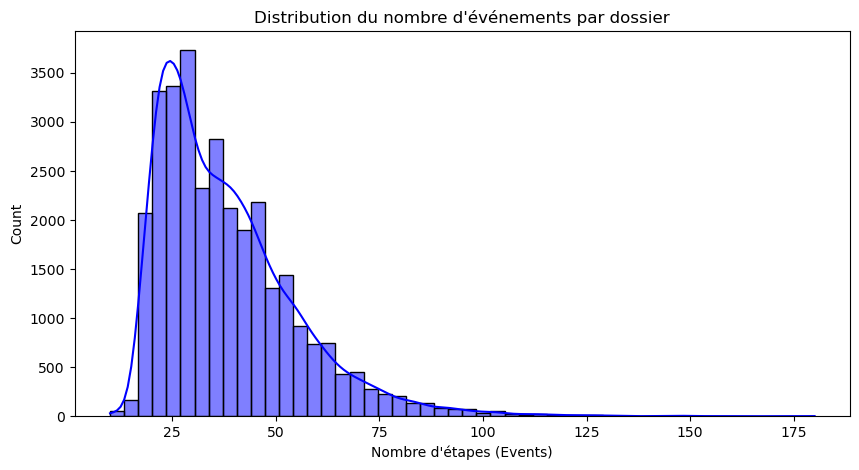

In [12]:
case_counts = df.groupby('case:concept:name').size()

print(f"\nNombre de dossiers uniques : {len(case_counts)}")
print(f"Moyenne d'étapes par dossier : {case_counts.mean():.2f}")

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(case_counts, bins=50, kde=True, color='blue')
plt.title('Distribution du nombre d\'événements par dossier')
plt.xlabel('Nombre d\'étapes (Events)')
plt.show()

In [13]:
print("\n--- Top 15 des activités les plus fréquentes ---")
print(df['concept:name'].value_counts().head(15))


--- Top 15 des activités les plus fréquentes ---
concept:name
W_Validate application      209496
W_Call after offers         191092
W_Call incomplete files     168529
W_Complete application      148900
W_Handle leads               47264
O_Create Offer               42995
O_Created                    42995
O_Sent (mail and online)     39707
A_Validating                 38816
A_Create Application         31509
A_Concept                    31509
A_Accepted                   31509
A_Complete                   31362
O_Returned                   23305
A_Incomplete                 23055
Name: count, dtype: int64


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = df.sort_values(['case:concept:name', 'time:timestamp'])
df['time_delta'] = df.groupby('case:concept:name')['time:timestamp'].diff().dt.total_seconds() / 3600
df['time_delta'] = df['time_delta'].fillna(0)
df['hour'] = df['time:timestamp'].dt.hour
df['day_of_week'] = df['time:timestamp'].dt.day_name()
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['day_of_week'] = pd.Categorical(df['day_of_week'], categories=days_order, ordered=True)


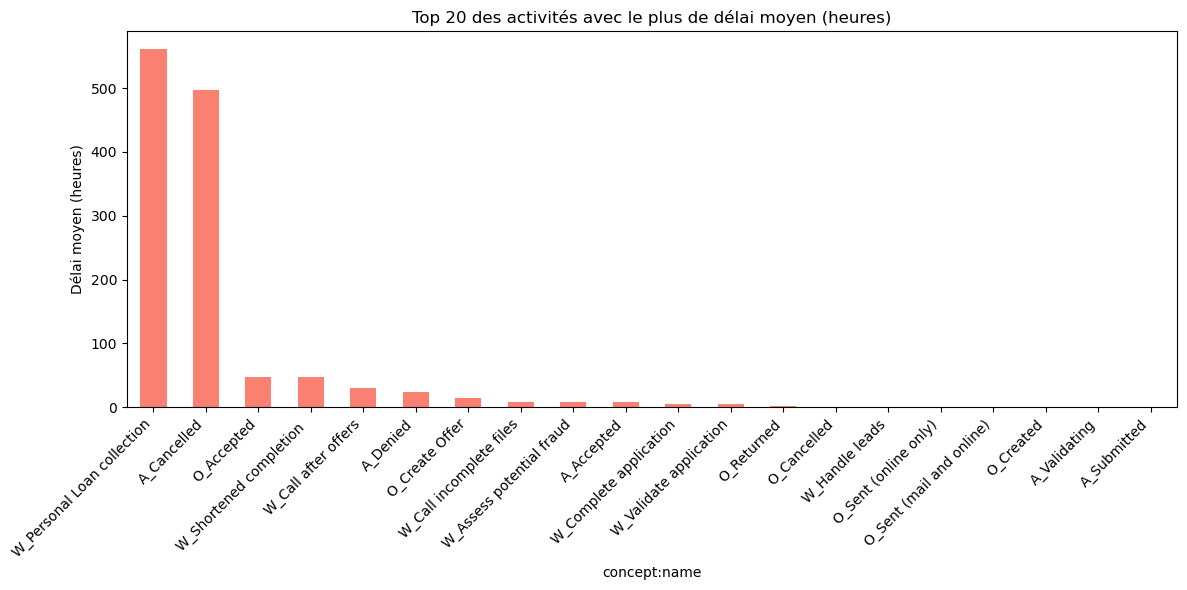

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
activity_delays = df.groupby('concept:name')['time_delta'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
activity_delays.head(20).plot(kind='bar', color='salmon')
plt.title('Top 20 des activités avec le plus de délai moyen (heures)')
plt.ylabel('Délai moyen (heures)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

C:\Users\ShinraS\AppData\Local\Temp\ipykernel_2996\1040293694.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=daily_counts, x='jour_semaine', y='volume', order=days_order, palette='viridis')


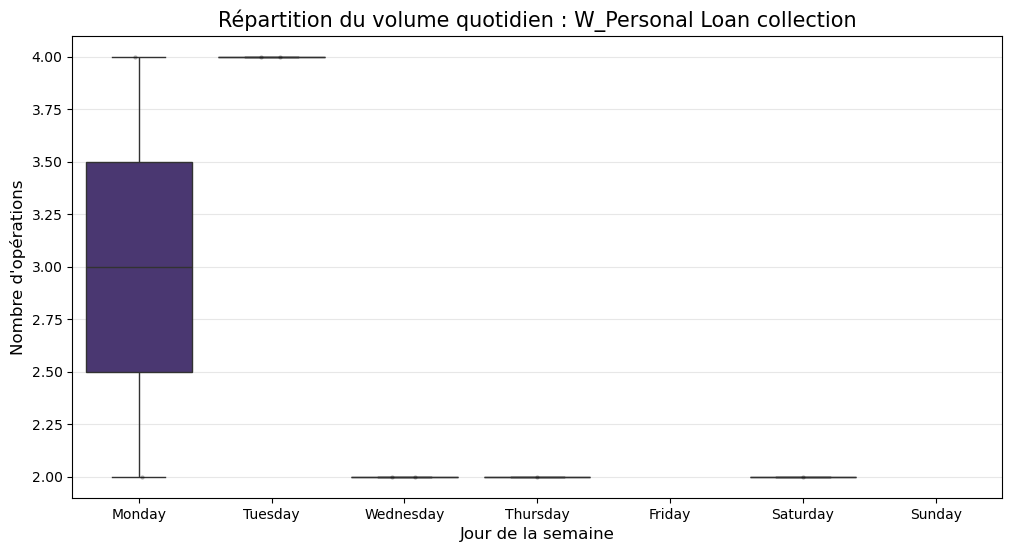

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
target_activity = 'W_Personal Loan collection'
df_coll = df[df['concept:name'] == target_activity].copy()
df_coll['date'] = df_coll['time:timestamp'].dt.date
df_coll['jour_semaine'] = df_coll['time:timestamp'].dt.day_name()
daily_counts = df_coll.groupby(['date', 'jour_semaine']).size().reset_index(name='volume')
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(12, 6))
sns.boxplot(data=daily_counts, x='jour_semaine', y='volume', order=days_order, palette='viridis')
sns.stripplot(data=daily_counts, x='jour_semaine', y='volume', order=days_order, color='black', size=3, alpha=0.3)

plt.title(f'Répartition du volume quotidien : {target_activity}', fontsize=15)
plt.xlabel('Jour de la semaine', fontsize=12)
plt.ylabel('Nombre d\'opérations', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.show()

C:\Users\ShinraS\AppData\Local\Temp\ipykernel_2996\3254371927.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=daily_counts, x='jour_semaine', y='volume', order=days_order, palette='viridis')


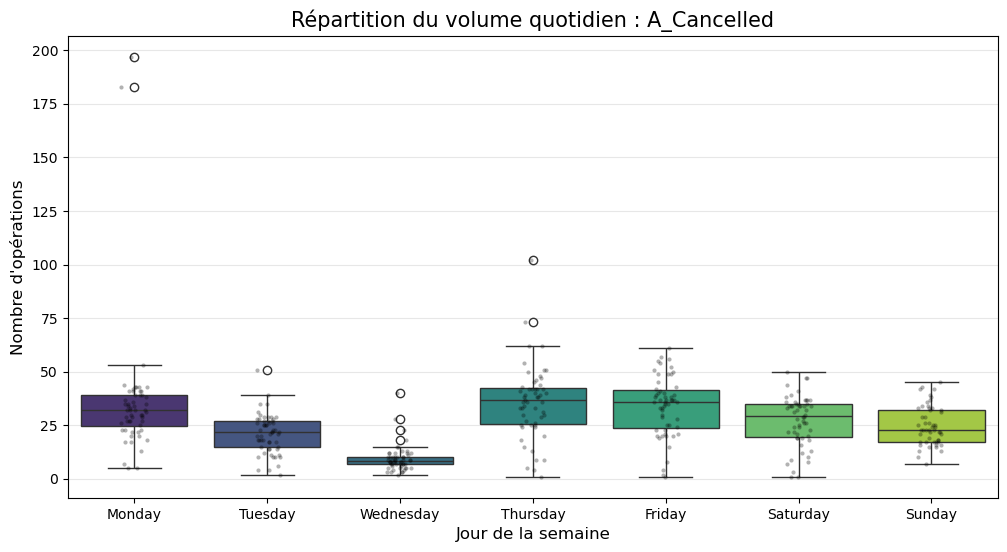

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
target_activity = 'A_Cancelled'
df_coll = df[df['concept:name'] == target_activity].copy()
df_coll['date'] = df_coll['time:timestamp'].dt.date
df_coll['jour_semaine'] = df_coll['time:timestamp'].dt.day_name()

daily_counts = df_coll.groupby(['date', 'jour_semaine']).size().reset_index(name='volume')

days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(12, 6))
sns.boxplot(data=daily_counts, x='jour_semaine', y='volume', order=days_order, palette='viridis')

sns.stripplot(data=daily_counts, x='jour_semaine', y='volume', order=days_order, color='black', size=3, alpha=0.3)

plt.title(f'Répartition du volume quotidien : {target_activity}', fontsize=15)
plt.xlabel('Jour de la semaine', fontsize=12)
plt.ylabel('Nombre d\'opérations', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.show()

C:\Users\ShinraS\AppData\Local\Temp\ipykernel_2996\2626783089.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=daily_counts, x='jour_semaine', y='volume', order=days_order, palette='viridis')


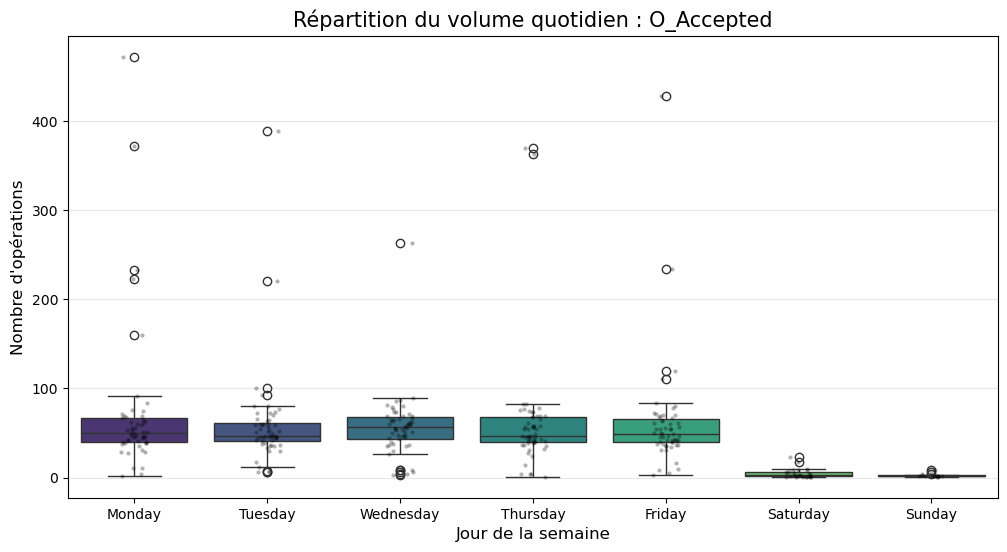

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

target_activity = 'O_Accepted'
df_coll = df[df['concept:name'] == target_activity].copy()
df_coll['date'] = df_coll['time:timestamp'].dt.date
df_coll['jour_semaine'] = df_coll['time:timestamp'].dt.day_name()
daily_counts = df_coll.groupby(['date', 'jour_semaine']).size().reset_index(name='volume')
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(12, 6))
sns.boxplot(data=daily_counts, x='jour_semaine', y='volume', order=days_order, palette='viridis')
sns.stripplot(data=daily_counts, x='jour_semaine', y='volume', order=days_order, color='black', size=3, alpha=0.3)

plt.title(f'Répartition du volume quotidien : {target_activity}', fontsize=15)
plt.xlabel('Jour de la semaine', fontsize=12)
plt.ylabel('Nombre d\'opérations', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.show()

In [19]:

print(df['time:timestamp'].head(50))

686058   2016-08-03 15:57:21.673000+00:00
686059   2016-08-03 15:57:21.734000+00:00
686060   2016-08-03 15:57:21.963000+00:00
686061   2016-08-03 15:58:28.286000+00:00
686062   2016-08-03 15:58:28.293000+00:00
686063   2016-08-03 15:58:28.299000+00:00
686064   2016-08-04 13:39:29.557000+00:00
686065   2016-08-04 13:50:12.281000+00:00
686066   2016-08-05 13:57:07.419000+00:00
686067   2016-08-05 13:59:57.320000+00:00
686068   2016-08-05 13:59:58.162000+00:00
686069   2016-08-05 14:01:23.264000+00:00
686070   2016-08-05 14:01:23.278000+00:00
686071   2016-08-05 14:01:23.284000+00:00
686072   2016-08-05 14:01:23.286000+00:00
686073   2016-08-05 14:01:23.288000+00:00
686074   2016-08-05 14:03:01.480000+00:00
686075   2016-08-09 18:25:01.546000+00:00
686076   2016-08-09 18:25:32.629000+00:00
686077   2016-09-05 06:00:36.710000+00:00
686078   2016-09-05 06:00:36.829000+00:00
686079   2016-09-05 06:00:36.893000+00:00
445739   2016-06-02 10:14:26.844000+00:00
445740   2016-06-02 10:14:26.88500

In [20]:
test_time = pd.DataFrame()
test_time['date_complete'] = df['time:timestamp']
test_time['jour'] = df['time:timestamp'].dt.day_name()
test_time['heure'] = df['time:timestamp'].dt.hour
print("Nombre d'événements par jour de la semaine")
print(test_time['jour'].value_counts())
print("\nAperçu du tableau :")
print(test_time.head(20))

Nombre d'événements par jour de la semaine
jour
Monday       248785
Tuesday      226559
Wednesday    223321
Friday       202811
Thursday     200183
Saturday      80019
Sunday        20589
Name: count, dtype: int64

Aperçu du tableau :
                          date_complete       jour  heure
686058 2016-08-03 15:57:21.673000+00:00  Wednesday     15
686059 2016-08-03 15:57:21.734000+00:00  Wednesday     15
686060 2016-08-03 15:57:21.963000+00:00  Wednesday     15
686061 2016-08-03 15:58:28.286000+00:00  Wednesday     15
686062 2016-08-03 15:58:28.293000+00:00  Wednesday     15
686063 2016-08-03 15:58:28.299000+00:00  Wednesday     15
686064 2016-08-04 13:39:29.557000+00:00   Thursday     13
686065 2016-08-04 13:50:12.281000+00:00   Thursday     13
686066 2016-08-05 13:57:07.419000+00:00     Friday     13
686067 2016-08-05 13:59:57.320000+00:00     Friday     13
686068 2016-08-05 13:59:58.162000+00:00     Friday     13
686069 2016-08-05 14:01:23.264000+00:00     Friday     14
686070 2016

In [21]:
df['jour'] = df['time:timestamp'].dt.day_name()
mask_weekend = df['jour'].isin(['Saturday', 'Sunday'])
df_weekend = df[mask_weekend]
print("--- TOP 10 DES OPÉRATIONS LE WEEK-END ---")
top_weekend = df_weekend['concept:name'].value_counts().head(10)
print(top_weekend)
print("\n--- TYPES DE TRANSITIONS LE WEEK-END ---")
print(df_weekend['lifecycle:transition'].value_counts())

--- TOP 10 DES OPÉRATIONS LE WEEK-END ---
concept:name
W_Call after offers        23949
W_Complete application     17414
W_Handle leads              8517
W_Call incomplete files     5306
A_Create Application        5056
A_Concept                   4648
O_Create Offer              4258
O_Created                   4258
A_Submitted                 4225
W_Validate application      4147
Name: count, dtype: int64

--- TYPES DE TRANSITIONS LE WEEK-END ---
lifecycle:transition
complete     43695
suspend      15016
schedule     14531
resume        9521
start         7810
ate_abort     6016
withdraw      4019
Name: count, dtype: int64


C:\Users\ShinraS\AppData\Local\Temp\ipykernel_2996\423767441.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df[df['time_delta'] > 0], x='day_of_week', y='time_delta', palette='viridis', estimator='mean')


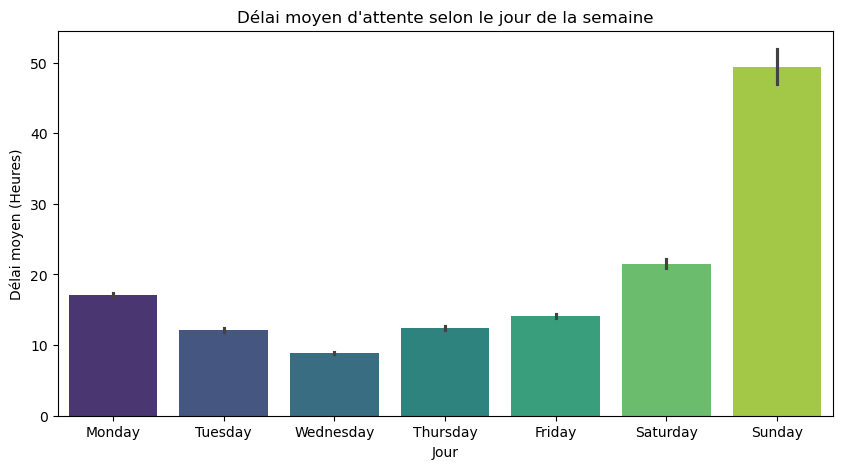

In [22]:
plt.figure(figsize=(10, 5))
sns.barplot(data=df[df['time_delta'] > 0], x='day_of_week', y='time_delta', palette='viridis', estimator='mean')
plt.title('Délai moyen d\'attente selon le jour de la semaine')
plt.ylabel('Délai moyen (Heures)')
plt.xlabel('Jour')
plt.show()

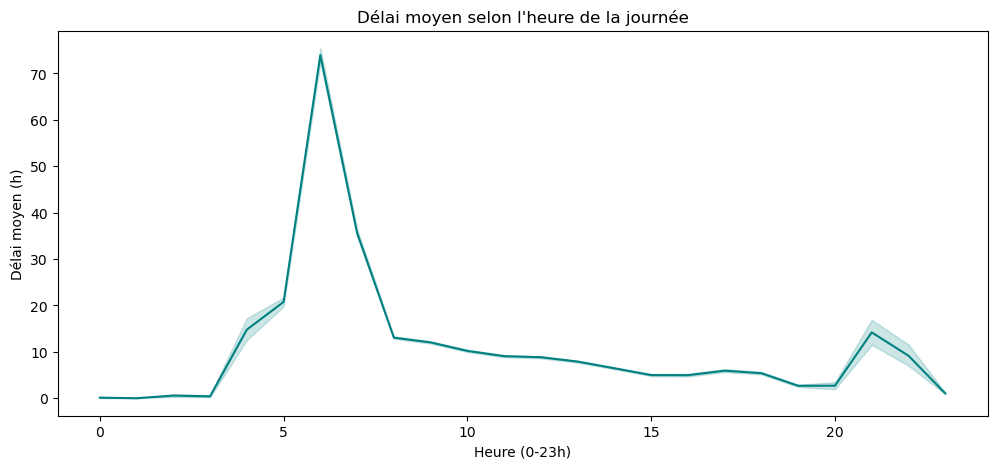

In [23]:
df['hour'] = df['time:timestamp'].dt.hour
df['day_of_week'] = df['time:timestamp'].dt.day_name()

plt.figure(figsize=(12, 5))
sns.lineplot(data=df, x='hour', y='time_delta', estimator='mean', color='teal')
plt.title('Délai moyen selon l\'heure de la journée')
plt.xlabel('Heure (0-23h)')
plt.ylabel('Délai moyen (h)')
plt.show()

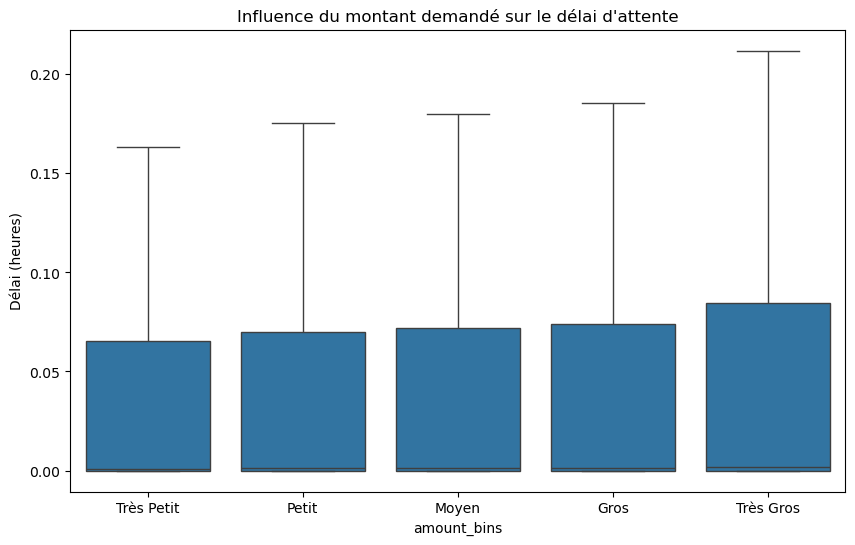

In [24]:
df['amount_bins'] = pd.qcut(df['case:RequestedAmount'], q=5, labels=['Très Petit', 'Petit', 'Moyen', 'Gros', 'Très Gros'])

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='amount_bins', y='time_delta', showfliers=False)
plt.title('Influence du montant demandé sur le délai d\'attente')
plt.ylabel('Délai (heures)')
plt.show()

In [25]:
df['is_web_start'] = (df['EventOrigin'] == 'Application') & (df['concept:name'].str.startswith('A_'))

web_cases = df[df['is_web_start']]['case:concept:name'].unique()
total_cases = df['case:concept:name'].unique()

print(f"Nombre de dossiers total : {len(total_cases)}")
print(f"Nombre de dossiers initiés via 'Application' (Web) : {len(web_cases)}")
print(f"Pourcentage : {len(web_cases)/len(total_cases)*100:.2f}%")

Nombre de dossiers total : 31509
Nombre de dossiers initiés via 'Application' (Web) : 31509
Pourcentage : 100.00%


In [26]:
print("Origine des événements (Canaux techniques) :")
print(df['EventOrigin'].value_counts())

print("\nRépartition Origine vs Type de crédit :")
print(pd.crosstab(df['EventOrigin'], df['case:ApplicationType']))

Origine des événements (Canaux techniques) :
EventOrigin
Workflow       768823
Application    239595
Offer          193849
Name: count, dtype: int64

Répartition Origine vs Type de crédit :
case:ApplicationType  Limit raise  New credit
EventOrigin                                  
Application                 23123      216472
Offer                       18172      175677
Workflow                    77205      691618


In [27]:
import pandas as pd
import numpy as np

# 1. Identifier les types d'applications
print("Types de canaux disponibles :")
print(df['case:ApplicationType'].value_counts())

# 2. Calcul du taux de conversion par canal
# On considère un succès si le dossier atteint 'O_Accepted' ou 'A_Pending' (selon l'article)
df['is_success'] = df['concept:name'].apply(lambda x: 1 if x in ['O_Accepted', 'A_Pending'] else 0)

# On groupe par Case pour avoir une ligne par dossier
conversion_stats = df.groupby('case:concept:name').agg({
    'case:ApplicationType': 'first',
    'is_success': 'max'
}).groupby('case:ApplicationType')['is_success'].mean() * 100

print("\n--- TAUX DE CONVERSION PAR CANAL ---")
print(conversion_stats)

# 3. Calcul du délai moyen de première réponse (Time-to-Offer)
# On cherche le temps entre la création du dossier (A_Create) et la première offre (O_Create)
first_event = df[df['concept:name'] == 'A_Create Application'][['case:concept:name', 'time:timestamp', 'case:ApplicationType']]
first_offer = df[df['concept:name'] == 'O_Create Offer'].groupby('case:concept:name')['time:timestamp'].min().reset_index()

delays = pd.merge(first_event, first_offer, on='case:concept:name', suffixes=('_start', '_offer'))
delays['wait_time_hours'] = (delays['time:timestamp_offer'] - delays['time:timestamp_start']).dt.total_seconds() / 3600

print("\n--- DÉLAI MÉDIAN DE RÉPONSE (HEURES) ---")
print(delays.groupby('case:ApplicationType')['wait_time_hours'].median())

Types de canaux disponibles :
case:ApplicationType
New credit     1083767
Limit raise     118500
Name: count, dtype: int64

--- TAUX DE CONVERSION PAR CANAL ---
case:ApplicationType
Limit raise    73.325465
New credit     52.428876
Name: is_success, dtype: float64

--- DÉLAI MÉDIAN DE RÉPONSE (HEURES) ---
case:ApplicationType
Limit raise    19.136370
New credit     22.404966
Name: wait_time_hours, dtype: float64


In [28]:
# 1. Statistiques descriptives du temps
print("--- Analyse Statistique des Délais ---")
stats_temps = df['time_delta'].describe()
mediane = df['time_delta'].median()

print(f"Moyenne : {stats_temps['mean']:.2f} heures")
print(f"Médiane : {mediane:.2f} heures")
print(f"90ème percentile : {df['time_delta'].quantile(0.9):.2f} heures (Les dossiers très lents)")



--- Analyse Statistique des Délais ---
Moyenne : 13.77 heures
Médiane : 0.00 heures
90ème percentile : 20.44 heures (Les dossiers très lents)


In [29]:
# Groupement par activité pour voir le délai moyen réel
real_bottlenecks = df.groupby('concept:name')['time_delta'].agg(['mean', 'median', 'count'])
real_bottlenecks = real_bottlenecks.sort_values(by='median', ascending=False)

print("--- Top 10 des activités les plus lentes (Réalité Historique) ---")
print(real_bottlenecks.head(10))

--- Top 10 des activités les plus lentes (Réalité Historique) ---
                                  mean      median   count
concept:name                                              
A_Cancelled                 496.237461  639.826998   10431
O_Accepted                   47.881753    2.890726   17228
A_Denied                     24.456242    0.653964    3753
A_Accepted                    7.879908    0.134458   31509
O_Create Offer               15.317987    0.055087   42995
W_Call incomplete files       8.891267    0.021049  168529
W_Assess potential fraud      8.872091    0.014150    3282
W_Handle leads                0.477736    0.009467   47264
W_Call after offers          30.133586    0.008748  191092
W_Personal Loan collection  560.857872    0.008246      22


In [30]:
df.to_parquet(
    "C:\\Users\\ShinraS\\Desktop\\Projet_Challenge_BPI\\bpi_2017_cleaned.parquet",
    index=False
)
